# Lab 8 (3/9): Data Manipulation

### Web pages
Course page: https://ambujtewari.github.io/teaching/STATS306-Winter2020/

Lab page: https://rogerfan.github.io/stats306_w20/

### Office Hours
    Mondays: 2-4pm, USB 2165
    
### Contact
    Questions on problems: Use the slack discussions
    If you need to email me, include in the subject line: [STATS 306]
    Email: rogerfan@umich.edu

In [1]:
require(tidyverse)


Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Tibble miscellanea

In [3]:
mydat = tribble(
  ~variable1, ~another_var, ~`final var`,
  'a', 2, 3.6,
  'b', 1, 8.5
)

print(mydat)

# A tibble: 2 x 3
  variable1 another_var `final var`
  <chr>           <dbl>       <dbl>
1 a                   2         3.6
2 b                   1         8.5


### Subsetting

For selecting variables out of tibbles, you can use `$` or `[[ ]]` (in addition to `select`).
* `$` only selects by name and requires you to hard-code in the variable name.
* `[[ ]]` selects by name or position and takes an argument, which can be a variable.


In [4]:
mydat

variable1,another_var,final var
<chr>,<dbl>,<dbl>
a,2,3.6
b,1,8.5


In [5]:
mydat$variable1

[1] "a" "b"

In [6]:
mydat[['variable1']]
mydat[[1]]

[1] "a" "b"

[1] "a" "b"

In [6]:
mydat[[x]]

ERROR: Error in `[[.tbl_df`(mydat, x): object 'x' not found


In [8]:
y = 'variable1'
mydat[[y]]

[1] "a" "b"

In [9]:
mydat$`final var`
mydat[['final var']]

[1] 3.6 8.5

[1] 3.6 8.5

In [10]:
varname = 'final var'
mydat[[varname]]

[1] 3.6 8.5

## Data Import

The package `readr` (part of `tidyverse`) contains several functions for reading in flat data. See the [readr documentation](https://readr.tidyverse.org/reference/index.html) for details. 

`read_csv` reads standard comma-delimited files. There are variants like `read_csv2` (semicolon-delimited) and `read_tsv` (tab-delimited), while `read_delim` allows reading in files with any delimiter. Note that all these read functions work both with local files and with hyperlinks.

Also note that the equivalents for writing/saving data files also exist, called `write_csv`, etc.

These are variants of `read.table`, `read.csv`, `write.table`, etc. which are a part of base R and can also be used for reading in files.

In [12]:
mtcars$car = rownames(mtcars)

write_csv(mtcars, "mtcars.csv")

In [13]:
mydat = read_csv("mtcars.csv")
head(mydat)

Parsed with column specification:
cols(
  mpg = col_double(),
  cyl = col_double(),
  disp = col_double(),
  hp = col_double(),
  drat = col_double(),
  wt = col_double(),
  qsec = col_double(),
  vs = col_double(),
  am = col_double(),
  gear = col_double(),
  carb = col_double(),
  car = col_character()
)



mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 Wag
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Datsun 710
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Hornet Sportabout
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,Valiant


An option that commonly needs tweaking is `na`: this specifies the value (or values) that are used to represent missing values in your file:

In [16]:
read_csv(
"a,b,c
1,2,.", na='.')

a,b,c
1,2,NA


## `pivot_longer` and `pivot_wider`

Remember that `pivot_longer` transforms datasets from "wide" to "long," collecting different column names into a variable. `pivot_wider` does the opposite, turning "long" datasets into "wide" ones by spreading out a variable's values into several columns

In [29]:
grades_wide = tribble(
  ~student,  ~`2015`, ~`2016`, ~`2017`,
'Roger',       83,      89,      93,
  'Jon',       92,      90,      93)
grades_wide

student,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>
Roger,83,89,93
Jon,92,90,93


In [30]:
grades_long = grades_wide %>% 
    pivot_longer(
        `2015`:`2017`, 
        names_to="year", 
        values_to="grade"
    )

grades_long

student,year,grade
<chr>,<chr>,<dbl>
Roger,2015,83
Roger,2016,89
Roger,2017,93
Jon,2015,92
Jon,2016,90
Jon,2017,93


In [31]:
grades_long %>% 
    pivot_wider(
        names_from="year", 
        values_from="grade"
    )

student,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>
Roger,83,89,93
Jon,92,90,93


### Pivoting with multiple value columns

In [41]:
family_wide <- tribble(
  ~family,  ~dob_child1,  ~dob_child2, ~gender_child1, ~gender_child2,
       1L, "1998-11-26", "2000-01-29",             1L,             2L,
       2L, "1996-06-22",           NA,             2L,             NA,
       3L, "2002-07-11", "2004-04-05",             2L,             2L,
       4L, "2004-10-10", "2009-08-27",             1L,             1L,
       5L, "2000-12-05", "2005-02-28",             2L,             1L,
)
family_wide

family,dob_child1,dob_child2,gender_child1,gender_child2
<int>,<chr>,<chr>,<int>,<int>
1,1998-11-26,2000-01-29,1,2
2,1996-06-22,NA,2,NA
3,2002-07-11,2004-04-05,2,2
4,2004-10-10,2009-08-27,1,1
5,2000-12-05,2005-02-28,2,1


If your variable names are well-formatted you can use the `names_sep` argument to separate the column names.

Note that the special argument `.value` is used to denote which part of the column name denotes the new value columns.

In [42]:
family_long = family_wide %>%
    pivot_longer(
        -family,
        names_to = c('.value', 'child'),
        names_sep = '_'
    )

family_long

family,child,dob,gender
<int>,<chr>,<chr>,<int>
1,child1,1998-11-26,1
1,child2,2000-01-29,2
2,child1,1996-06-22,2
2,child2,NA,NA
3,child1,2002-07-11,2
3,child2,2004-04-05,2
4,child1,2004-10-10,1
4,child2,2009-08-27,1
5,child1,2000-12-05,2


In [43]:
family_long %>%
    pivot_wider(
        names_from = c('child'),
        values_from = c('dob', 'gender')
    )

family,dob_child1,dob_child2,gender_child1,gender_child2
<int>,<chr>,<chr>,<int>,<int>
1,1998-11-26,2000-01-29,1,2
2,1996-06-22,NA,2,NA
3,2002-07-11,2004-04-05,2,2
4,2004-10-10,2009-08-27,1,1
5,2000-12-05,2005-02-28,2,1


For more complex variable names, you can also use the `names_pattern` to match any pattern that exists.

In [44]:
family_long = family_wide %>%
    pivot_longer(
        -family,
        names_to = c('.value', 'child'),
        names_pattern = '(.*)_(.*)'
    )

family_long

family,child,dob,gender
<int>,<chr>,<chr>,<int>
1,child1,1998-11-26,1
1,child2,2000-01-29,2
2,child1,1996-06-22,2
2,child2,NA,NA
3,child1,2002-07-11,2
3,child2,2004-04-05,2
4,child1,2004-10-10,1
4,child2,2009-08-27,1
5,child1,2000-12-05,2


### Handling missing values

In [78]:
head(fish_encounters)

fish,station,seen
<fct>,<fct>,<int>
4842,Release,1
4842,I80_1,1
4842,Lisbon,1
4842,Rstr,1
4842,Base_TD,1
4842,BCE,1


In [72]:
fish_wide1 = fish_encounters %>% 
    pivot_wider(names_from = station, values_from = seen)

head(fish_wide1)

fish,Release,I80_1,Lisbon,Rstr,Base_TD,BCE,BCW,BCE2,BCW2,MAE,MAW
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4842,1,1,1,1,1,1,1,1,1,1,1
4843,1,1,1,1,1,1,1,1,1,1,1
4844,1,1,1,1,1,1,1,1,1,1,1
4845,1,1,1,1,1,NA,NA,NA,NA,NA,NA
4847,1,1,1,NA,NA,NA,NA,NA,NA,NA,NA
4848,1,1,1,1,NA,NA,NA,NA,NA,NA,NA


In [81]:
fish_wide = fish_encounters %>% 
    pivot_wider(
      names_from = station, 
      values_from = seen,
      values_fill = list(seen = 0)
    )

head(fish_wide)

fish,Release,I80_1,Lisbon,Rstr,Base_TD,BCE,BCW,BCE2,BCW2,MAE,MAW
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4842,1,1,1,1,1,1,1,1,1,1,1
4843,1,1,1,1,1,1,1,1,1,1,1
4844,1,1,1,1,1,1,1,1,1,1,1
4845,1,1,1,1,1,0,0,0,0,0,0
4847,1,1,1,0,0,0,0,0,0,0,0
4848,1,1,1,1,0,0,0,0,0,0,0


In [79]:
fish_wide1 %>% 
    pivot_longer(I80_1:MAW, 
                 names_to="station", 
                 values_to="seen")

fish,Release,station,seen
<fct>,<int>,<chr>,<int>
4842,1,I80_1,1
4842,1,Lisbon,1
4842,1,Rstr,1
4842,1,Base_TD,1
4842,1,BCE,1
4842,1,BCW,1
4842,1,BCE2,1
4842,1,BCW2,1
4842,1,MAE,1


In [80]:
fish_wide1 %>% 
    pivot_longer(I80_1:MAW, 
                 names_to="station", 
                 values_to="seen", 
                 values_drop_na=TRUE)

fish,Release,station,seen
<fct>,<int>,<chr>,<int>
4842,1,I80_1,1
4842,1,Lisbon,1
4842,1,Rstr,1
4842,1,Base_TD,1
4842,1,BCE,1
4842,1,BCW,1
4842,1,BCE2,1
4842,1,BCW2,1
4842,1,MAE,1


## Question 1

The following is a dataset of US voting participation, broken down by gender and age group.

In [47]:
voting_par <- tribble(
  ~year,  ~m_1824,  ~f_1824, ~m_2544, ~f_2544, ~m_4564, ~f_4564, ~m_65p, ~f_65p,
    2018, 27.4, 32.8, 38.0, 42.9, 53.7, 56.3, 65.4, 62.5,
    2014, 14.7, 17.2, 26.3, 30.4, 45.0, 47.0, 60.1, 55.5,
    2010, 18.7, 20.6, 30.5, 33.9, 50.7, 51.5, 62.0, 56.5,
    2006, 18.6, 21.2, 32.3, 36.5, 53.4, 55.1, 64.4, 57.5,
    2002, 15.7, 18.6, 32.7, 35.4, 52.6, 53.5, 65.4, 57.7
)

voting_par

year,m_1824,f_1824,m_2544,f_2544,m_4564,f_4564,m_65p,f_65p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018,27.4,32.8,38.0,42.9,53.7,56.3,65.4,62.5
2014,14.7,17.2,26.3,30.4,45.0,47.0,60.1,55.5
2010,18.7,20.6,30.5,33.9,50.7,51.5,62.0,56.5
2006,18.6,21.2,32.3,36.5,53.4,55.1,64.4,57.5
2002,15.7,18.6,32.7,35.4,52.6,53.5,65.4,57.7


Convert this dataset to a long version. The new dataset should have variables `year`, `gender`, `age`, and `voting_perc`. 

Use ggplot to visualize this new dataset. Make whatever aesthetic and formatting choices that make the most sense to you.

In [51]:
voting_long = voting_par %>%
    pivot_longer(
        -year,
        names_to = c('gender', 'age'),
        names_sep = '_',
        values_to = 'voting_perc'
    )

head(voting_long)

year,gender,age,voting_perc
<dbl>,<chr>,<chr>,<dbl>
2018,m,1824,27.4
2018,f,1824,32.8
2018,m,2544,38.0
2018,f,2544,42.9
2018,m,4564,53.7
2018,f,4564,56.3


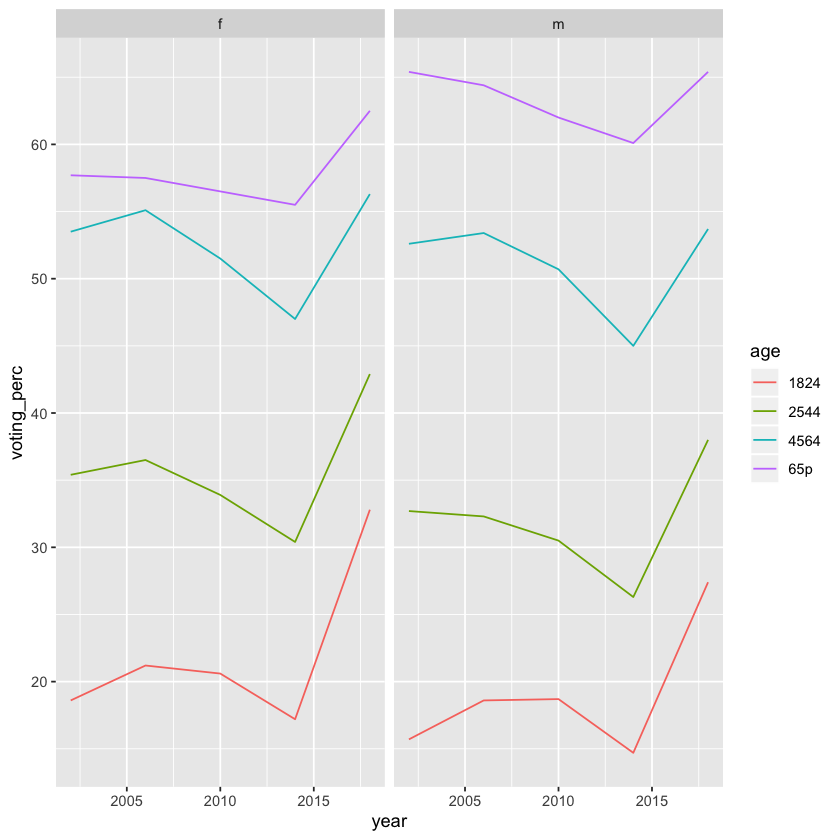

In [52]:
ggplot(voting_long, aes(x=year, y=voting_perc, color=age)) +
    geom_line() +
    facet_wrap(~gender)

## Question 2

The following is an example dataset of answers from a multiple choice questionnaire, where for each question respondents could select up to three choices.

In [54]:
multi <- tribble(
  ~id, ~choice1, ~choice2, ~choice3,
  1, "A", "B", "C",
  2, "C", "B",  NA,
  3, "D",  NA,  NA,
  4, "B", "D",  NA
)

multi

id,choice1,choice2,choice3
<dbl>,<chr>,<chr>,<chr>
1,A,B,C
2,C,B,NA
3,D,NA,NA
4,B,D,NA


Using pivot and other dplyr operations, turn `multi` into the following dataset that is easier to use.
```
# A tibble: 4 x 5
     id A     B     C     D    
  <dbl> <lgl> <lgl> <lgl> <lgl>
1     1 TRUE  TRUE  TRUE  FALSE
2     2 FALSE TRUE  TRUE  FALSE
3     3 FALSE FALSE FALSE TRUE 
4     4 FALSE TRUE  FALSE TRUE 
```

In [66]:
multi2 = multi %>% 
    pivot_longer(-id, names_to='choice', values_to='answer', values_drop_na=TRUE) %>%
    mutate(checked=TRUE) %>% 
    select(-choice)

multi2

id,answer,checked
<dbl>,<chr>,<lgl>
1,A,TRUE
1,B,TRUE
1,C,TRUE
2,C,TRUE
2,B,TRUE
3,D,TRUE
4,B,TRUE
4,D,TRUE


In [83]:
multi2 %>% 
    pivot_wider(
        names_from='answer', 
        values_from='checked', 
        values_fill=c(checked=FALSE)
    )

id,A,B,C,D
<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,TRUE,TRUE,TRUE,FALSE
2,FALSE,TRUE,TRUE,FALSE
3,FALSE,FALSE,FALSE,TRUE
4,FALSE,TRUE,FALSE,TRUE
